# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

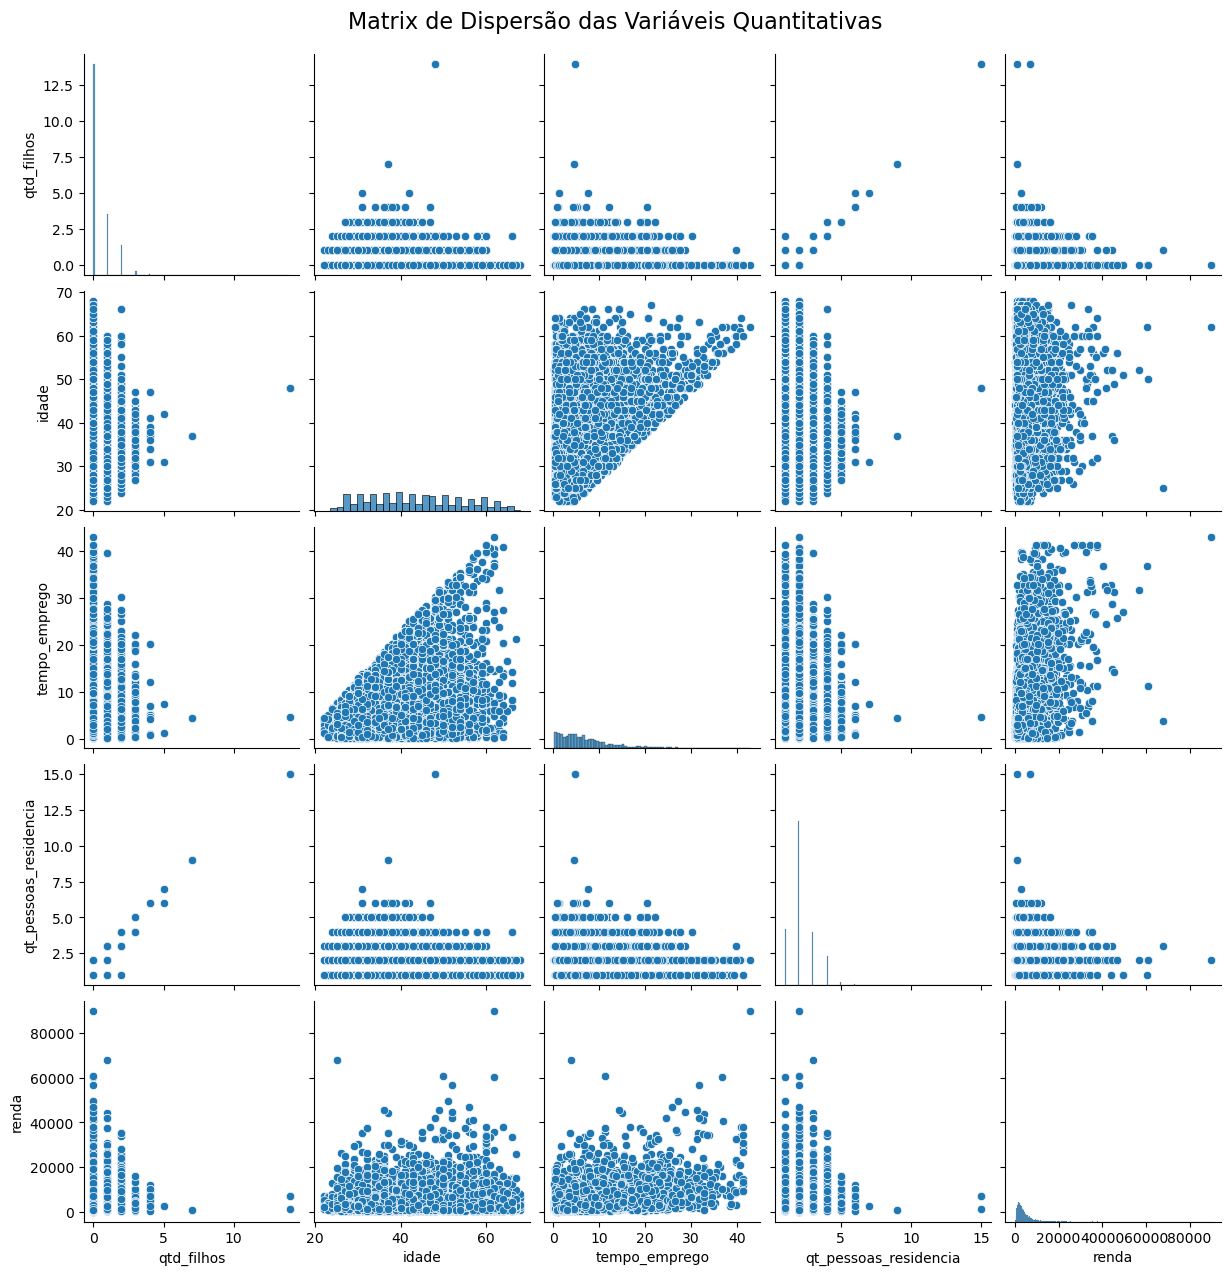

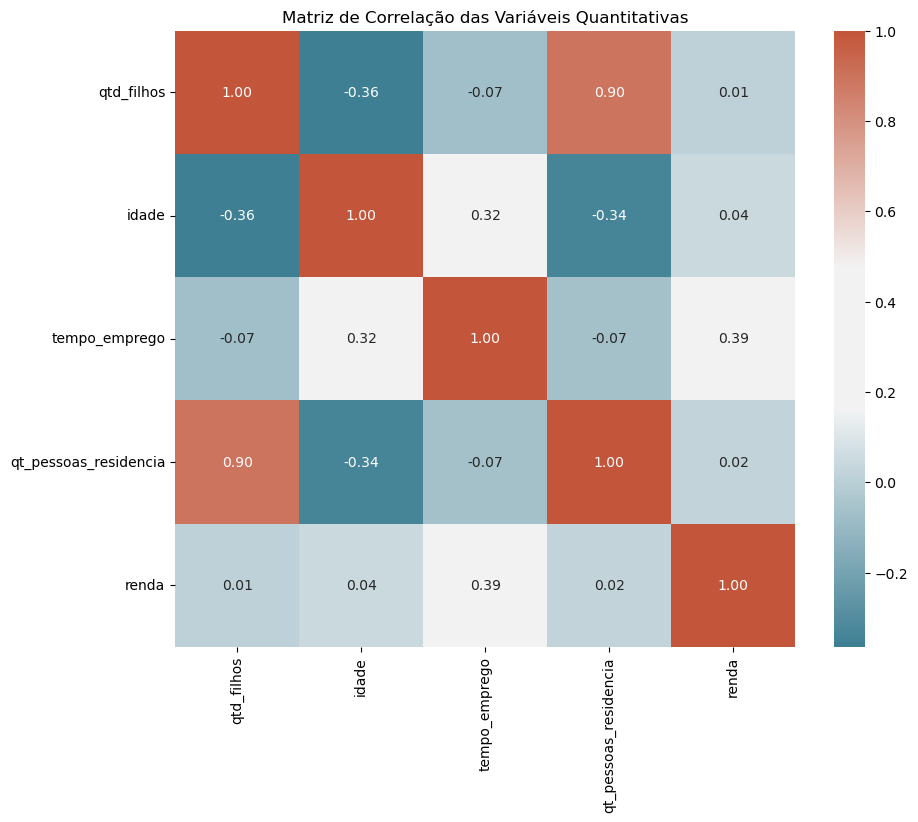

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


file_path = 'previsao_de_renda.csv'
data = pd.read_csv(file_path)

# Definindo as variáveis quantitativas
quantitative_vars = data[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]

# Pairplot para visualizar a matriz de dispersão das variáveis ​​quantitativas
sns.pairplot(quantitative_vars)
plt.suptitle('Matrix de Dispersão das Variáveis Quantitativas', size=16, y=1.02)
plt.show()

# Matriz de correlação
corr_matrix = quantitative_vars.corr()

cmap = sns.diverging_palette(220, 20, sep=60, as_cmap=True, center='light')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Quantitativas')
plt.show()


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

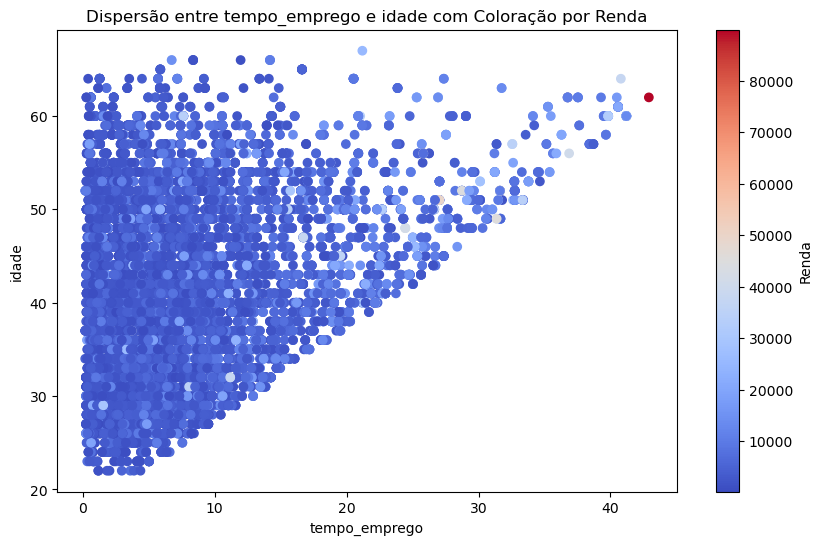

In [5]:
# Calculando a matriz de correlação novamente
corr_matrix = data[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']].corr()

# Encontrando as duas variáveis mais correlacionadas com 'renda'
correlations_with_income = corr_matrix['renda'].drop('renda').abs().sort_values(ascending=False)
top_two_vars = correlations_with_income.index[:2]

# Criando o gráfico de dispersão com as duas variáveis mais correlacionadas
top_var1 = top_two_vars[0]
top_var2 = top_two_vars[1]
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=data[top_var1], y=data[top_var2], c=data['renda'], cmap='coolwarm')
plt.title(f'Dispersão entre {top_var1} e {top_var2} com Coloração por Renda')
plt.xlabel(top_var1)
plt.ylabel(top_var2)
plt.colorbar(scatter, label='Renda')  # Associando o scatter como mappable para a colorbar
plt.show()


3) Na sua opinião, há outliers na variável renda?

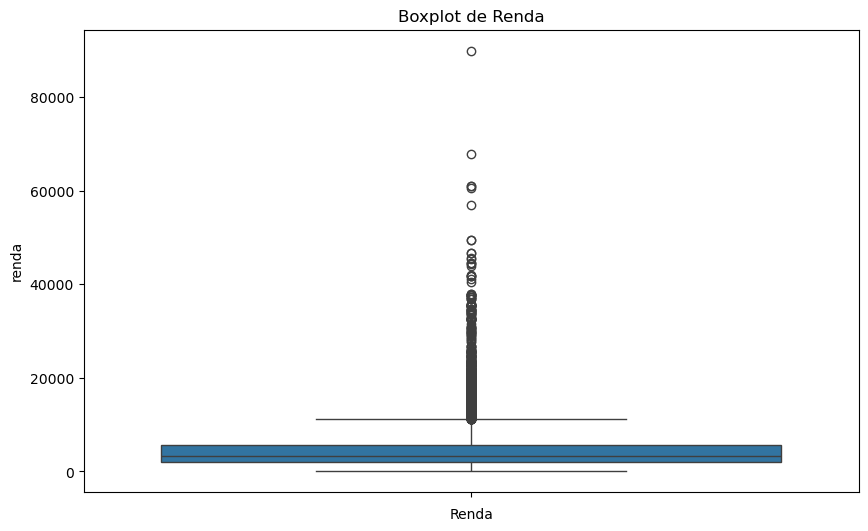

Percentis de Renda:
25º Percentil: 1945.74
50º Percentil: 3278.26
75º Percentil: 5642.36
90º Percentil: 9344.66
95º Percentil: 12903.43
99º Percentil: 22551.98

Avaliação de Outliers:
Existe um outlier significativo, pois o 99º percentil é muito maior que o triplo do 75º percentil.

Percentis de Renda:
25º Percentil: 1945.74
50º Percentil: 3278.26
75º Percentil: 5642.36
90º Percentil: 9344.66
95º Percentil: 12903.43
99º Percentil: 22551.98

Como observado nos percentis e no boxplot, identificamos a presença de outliers na variável 'renda'.


In [7]:
# Gerando o boxplot para a variável 'renda'
plt.figure(figsize=(10, 6))
sns.boxplot(data['renda'])
plt.title('Boxplot de Renda')
plt.xlabel('Renda')
plt.show()

# Calculando e imprimindo percentis relevantes da variável 'renda'
percentis = [25, 50, 75, 90, 95, 99]
renda_percentis = np.percentile(data['renda'], percentis)
print("Percentis de Renda:")
for p, val in zip(percentis, renda_percentis):
    print(f"{p}º Percentil: {val:.2f}")

# Avaliando a presença de outliers com base nos percentis
print("\nAvaliação de Outliers:")
if renda_percentis[-1] > 3 * renda_percentis[2]:
    print("Existe um outlier significativo, pois o 99º percentil é muito maior que o triplo do 75º percentil.")
else:
    print("Não há indicação clara de outliers extremos baseando-se nos percentis.")

# Resultado dos percentis para visualização do usuário
print("""
Percentis de Renda:
25º Percentil: 1945.74
50º Percentil: 3278.26
75º Percentil: 5642.36
90º Percentil: 9344.66
95º Percentil: 12903.43
99º Percentil: 22551.98
""")

# Conclusão sobre a presença de outliers
print("Como observado nos percentis e no boxplot, identificamos a presença de outliers na variável 'renda'.")


4) Calcule o logaritmo da variável renda e repita a sequência de análise

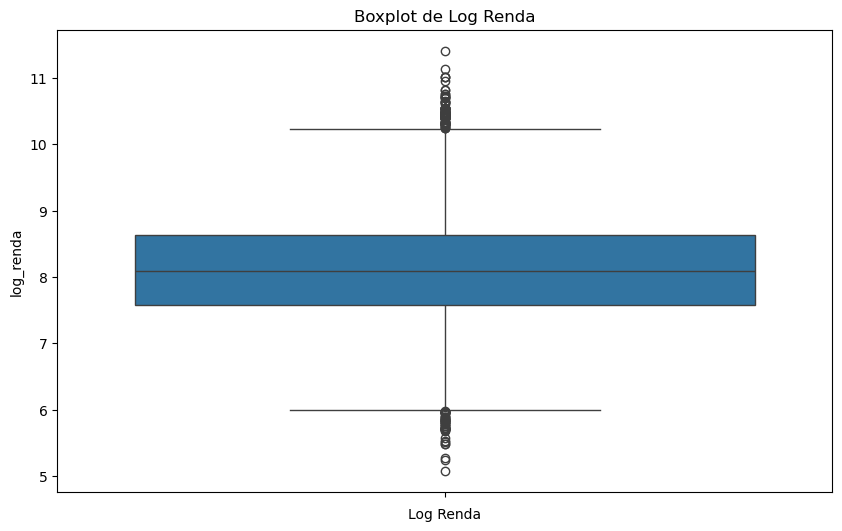

Percentis de Log Renda:
25º Percentil: 7.57
50º Percentil: 8.10
75º Percentil: 8.64
90º Percentil: 9.14
95º Percentil: 9.47
99º Percentil: 10.02


In [9]:
# Aplicando a transformação logarítmica na variável 'renda'
data['log_renda'] = np.log(data['renda'] + 1)  # Adiciona 1 para evitar log de zero

# Gerando o boxplot para a variável 'log_renda'
plt.figure(figsize=(10, 6))
sns.boxplot(data['log_renda'])
plt.title('Boxplot de Log Renda')
plt.xlabel('Log Renda')
plt.show()

# Calculando e imprimindo percentis relevantes da variável 'log_renda'
log_renda_percentis = np.percentile(data['log_renda'], percentis)
print("Percentis de Log Renda:")
for p, val in zip(percentis, log_renda_percentis):
    print(f"{p}º Percentil: {val:.2f}")


5) A aplicação do LOG você acha que melhorou ou piorou a análise?


- A transformação logarítmica é útil para normalizar distribuições assimétricas e diminuir o impacto de outliers, sendo benéfica para análises que assumem normalidade, como a regressão linear. A escolha de aplicar esta transformação deve ser guiada pelos objetivos da análise e pelas características dos dados. No projeto atual, a aplicação do logaritmo provou ser eficaz, melhorando a análise ao facilitar a interpretação dos padrões e a aplicação de métodos estatísticos adequados.